<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M1_AST_03_Probability_Theory_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IITM and TalentSprint
### Assignment 03: Probability Theory

## Learning Objectives

At the end of the experiment, you will be able to

* understand the basics of probability including the three axioms of probability.
* use of discrete and continuous random variables.
* probability mass function and probability density functions
* some common probability distributions.
* Moment and expectation of random variables.
* covariance and correlation between random variables

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2419592" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9845319358" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_03_Probability_Theory_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/ADSMI/Datasets/SIMPLEPENDULUMOSCILLATIONDATA.zip")
    ipython.magic("sx unzip SIMPLEPENDULUMOSCILLATIONDATA.zip")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Introduction

Probability and statistics form the core of data science. It helps us estimate and predict outcome of different occurances which in turn, helps us make informed decisions. Probability is thus indispencable for analyzing real world data. In this assignment we will introduce the basic concepts of probability.

In it's simplest form, probability can be thought of the chance of occurance of a certain outcome among all possible outcomes. All possible outcomes is often denoted by the term *sample space* often denoted by $S$. The set of favouranble outcomes can be denoted by $F$. Then the mathematical formula for calculating probability is:

<center>$ P(Event) = \frac{Number ~of ~favourable ~outcomes}{Total ~number ~of ~outcomes} = \frac{n(F)}{n(S)} $</center>

<!-- <center>$ P(Event) = \frac{n(F)}{n(S)} $</center> -->



In this assignment, we start with three axioms of probability which are essential for it's understanding.

### Three axioms of probability theory

1. Probability of any event lies between 0 and 1.
> Therefore for any event $E$, $0 \leq P(E) \leq 1$, where $P(E)$ is the probability of the event.

2. The total probability of a sample space $S$, is 1.
> Therefore, $P(S) = 1$.

3. When event A and event B are mutually exclusive i.e. if they cannot occur at the same time. This means that A and B do not share any outcomes and P(A AND B) = 0, then $P(A \cap B) = 0$. This can also be represented as $P(A \cup B) = P(A) + P(B)$.

### Other important formulas and terms in probability
1. Addition rule in probability: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
2. Complementary event of $A$ is denoted by $A'$. $A'$ follows the following properties
> The union of $A'$ and $A$ is equal to the total sample space $S$. Therefore, $A' \cup A = S$ <br>
> Therefore, $P(A') = 1 - P(A)$


### Import the necessary packages for the following examples

In [4]:
import random
import numpy as np
import scipy
from itertools import product
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### Examples
**Q1. Calculate the probability of getting an odd number when a dice is rolled.**

Ans - The sample space $S$ of the dice roll experiment is $S = \{1, 2, 3, 4, 5, 6\}$. Event $A$ is getting an even number after rolling the dice. The favourable outcomes for this problem are $F = \{1, 3, 5\}$. Therefore, the probability of getting an odd number when a dice is rolled is $\frac{n(F)}{n(S)} = \frac{3}{6} = \frac{1}{2}$.


**Q2. Getting $4$ or $5$ in a dice throw?**

Ans - The first thing to note here is that, we can never get $4$ and $5$ together in a dice throw. Therefore, $P(A \cap B) = 0$. Therefore, the outcomes of the throw is mutually exclusive. Thus, $P(A \cup B) = P(A) + P(B) = \frac{1}{6} + \frac{1}{6} = \frac{1}{3}$



In [5]:
# Let us define a function for probability which we will use multiple times later.
# Here both the variables passed to the function is n(F) and n(S)
def find_prob(favourable_outcomes, sample_space):
  if sample_space < favourable_outcomes:
    print ("There is a mistake in calculation. Probability <= 1")
    return -1
  else:
    prob = favourable_outcomes/sample_space
    return prob

In [6]:
# Solving Q1 and Q2 by this code snippet. This is to check the correctness of the above function.
S = [1, 2, 3, 4, 5, 6]
F = [1, 3, 5]
# YOUR CODE HERE
prob_f = find_prob(len(F), len(S))
print("Probability of getting an odd number in a dice throw: ", prob_f)

# Two desired outcomes from a dice throw.
F1 = [4]
F2 = [5]
prob_f1 = find_prob(len(F1), len(S))
prob_f2 = find_prob(len(F2), len(S))
prob_f1_f2 = prob_f1 + prob_f2
print("Probability of getting 4 or 5 in a dice throw: ", prob_f1_f2)

# YOUR CODE HERE

Probability of getting an odd number in a dice throw:  0.5
Probability of getting 4 or 5 in a dice throw:  0.3333333333333333


### Conditional Probability (Independent vs Dependent Events)
As the name suggests, independent events are those, which does not affect the outcome of a future event in a sample space. Two events $A$ and $B$ are said to be independent, if the occurance of $A$ does not give any information about occurance of $B$ and vice-versa. For example, if a dice is rolled then probability of getting $2$ is equal to $\frac{1}{6}$, and when the dice is rolled again, the probability of getting $2$ is again $\frac{1}{6}$ without any change. Thus, both the events are said to be independent. If events $A$ and $B$ are independent, then the following holds true -
> $P(A \cap B) = P(A) \times P(B)$





On the other hand, for dependent events, the probability of $A$ given $B$ is represented as, $P(A|B) = \frac{P(A \cap B)}{P(B)}$. Here, event $A$ occurs before $B$ and has an effect on the outcome of $B$.


#### Examples
**Q3. We roll a dice twice. What is the probability of getting an even number in the first roll AND a prime number in the second roll?**

Ans - The sample space $S$ of the dice roll experiment is $S = \{1, 2, 3, 4, 5, 6\}$. Let event $A$ be an event of getting an even number in the first roll. Therefore, $P(A) = \frac{1}{2}$. Let event $B$ be the event of getting a prime number in the second roll. Therefore, the favourable outcomes for $B$ are $\{2, 3, 5\}$. Hence, $P(B) = \frac{1}{2}$. Because events $A$ and $B$ are independent to each other, $P(A \cap B) = \frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$.


In [7]:
# Code for Q3.
S = [1, 2, 3, 4, 5, 6]
F_even = [2, 4, 6]
F_prime = [2,3, 5]

# YOUR CODE HERE

prob_f_even_f_prime = find_prob(len(F_even), len(S)) * find_prob(len(F_prime), len(S))
print("Probability of getting an even number in first throw and a prime number in second: ", prob_f_even_f_prime)

Probability of getting an even number in first throw and a prime number in second:  0.25


**Q4. We provide a fake data generator to generate data for 100,000 people. It generates 100,000 random "people" and randomly assigns them as being in their 20's, 30's, 40's, 50's, 60's, or 70's. It then assigns a lower probability for young people to buy stuff. In the end, we have two Python dictionaries: "totals" contains the total number of people in each age group. "purchases" contains the total number of things purchased by people in each age group. The grand total of purchases is in totalPurchases, and we know the total number of people is 100,000.**

In [8]:
# Fake data generator for a set of 100,000 people. The dictionaries totals and purchases will hold the data for 100,000 dummy people.

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = float(ageDecade) / 100.0
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

print ("Total number of people in different each range: ", totals)
print ("Purchases made by people from different age ranges", purchases)
print ("Total purchases made: ", totalPurchases)

# YOUR CODE HERE for printing the results

Total number of people in different each range:  {20: 16815, 30: 16627, 40: 16752, 50: 16717, 60: 16563, 70: 16526}
Purchases made by people from different age ranges {20: 3385, 30: 4959, 40: 6634, 50: 8188, 60: 9940, 70: 11594}
Total purchases made:  44700


**What is the probability of making a purchase GIVEN the customer has the age of 30?**

Ans - We will solve this problem using the following code and show the direct use of the formula of  $P(A|B) = \frac{P(A \cap B)}{P(B)}$. Here, $A$ is considered to be the event of a purchase and $B$ is considered to be being in $30$'s.

In [9]:
# First let us solve this directly. purchases[30] has the number of purchases made by 30 year olds. totals[30] contains the total number of 30 year olds.

# YOUR CODE HERE
P_A_B_= find_prob(purchases[30], totals[30])
print ("P(A|B) = ", P_A_B_)

P(A|B) =  0.2982498346063631


In [10]:
# Now let us try out the formula and see if it maches the above result.

# probability of being 30 in the corpus. P(B) = ?
P_B = find_prob(totals[30], 100000)
print ("P(B) = ", P_B)

# probability of making a purchase (regardless of age). P(A) = ?
# YOUR CODE HERE
P_A = find_prob(totalPurchases, 100000)
print ("P(A) = ", P_A)

# What is the probability of both being in your 30's and buying something, out of the total population - not just the population of people in their 30's.
# P(A Intersection B) = ?

P_A_INT_B = find_prob(purchases[30], 100000)
print ("P(A INT B) = ", P_A_INT_B)

# Therefore, now lets test the formula. P(A|B) = P(A INT B)/P(B)
P_A_B_formula = P_A_INT_B / P_B
print ('P(purchase | 30s) using formula: ', P_A_B_formula)

# PLEASE NOTE THAT THE FORMULA GIVES THE EXACT SAME RESULT AS THE PREVIOUS CELL.

P(B) =  0.16627
P(A) =  0.447
P(A INT B) =  0.04959
P(purchase | 30s) using formula:  0.2982498346063632


### Random Variables

In probability theory, a random variable is considered to denote the outcome of a chance experiment. A random variable is of two types.
1. Discrete random variables: It can assume finite number of values or countably infinite number of values. By countably infinite, we mean that all possible values that a random variable can assume can be counted and listed in some order. For example, noting the number of heads and tails in multiple coin tosses.
2. Continuous random variables: These can assume any value in some interval on the real number line. For example, measuring the volume of gases in a tank.

#### Mathematical defination
A random variable is a mapping or function $ X: S → ℝ $ that assigns a real number $X(ω)$ to each outcome $ω$. Here, $S$ is the sample space.

#### Example of a discrete random variable problem
**Q5. Two dices are rolled simultaneously. Let $X$ be the sum of the outcomes from both the dices. What is the probability of having the sum to be equal to $10$?**

Ans- The total sample space size (possible combinations) of this experiment is $6^2 = 36$. Here $S = \{(1,1), (1,2), (1,3)...(2,1),...(6,6)\}$. Out of these combinations the combinations that allows sum to be $10$ are $\{(4,6), (5,5), (6,4)\}$. Therefore, the probability of having the sum equal to $10$ is $\frac{3}{36} = \frac{1}{12}$


#### Probability Mass Functions (PMF)

PMF is a function that describes the relationship between the probability of obtaining all the different values that a random variable can assume in a given sample space. More formally if $f_X$ is the PMF on a random variable $X$ then,

$f_X(x) = P(X=x)$ where $x$ are the values that the random variable can assume.

#### Example
**Q6. Plot the PMF for the problem given in Q5 using python.**

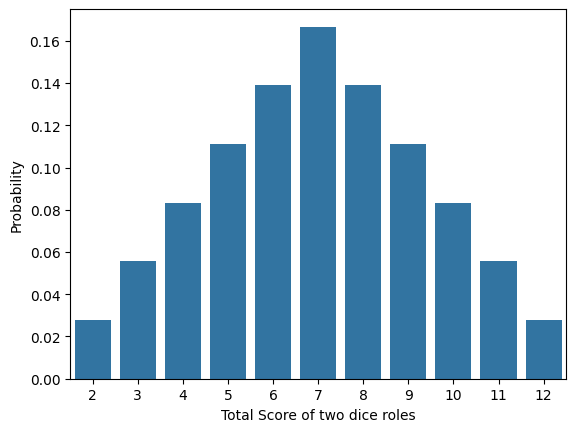

In [13]:
# Creating a dice.
dice = range(1,7)

# Creating the combinations for the outcomes of two dices.
dice_scores = dict(zip(range(1,7), range(1, 7)))

# Creating the sample space for this problem. Please uncomment the print statement to check.
S = {(i, j): dice_scores[i] + dice_scores[j] for i, j in product(dice, repeat=2)}
# print (S)

# length of the sample space
n_S = len(S)

# Collecting all the sums possible in the sample space. (1,2) -> 3, (2,1) -> 3. Therefore freq for 3 is 2.
# We get all the possible outcomes and their frequencies using this.
frequencies = dict.fromkeys(S.values(), 0)
for sample_outcome, overall_score in S.items():
    frequencies[overall_score] += 1

# Calculating the probability for each possible outcome by freq of an outcome/total number of outcome
probabilities = pd.DataFrame(
    data=[
        [value, frequency / n_S]
        for value, frequency in frequencies.items()
    ],
    columns=['Total Score of two dice roles', 'Probability']
)

# plot PMF as barplot
# YOUR CODE HERE
ax = sns.barplot(
    x='Total Score of two dice roles',
    y='Probability',
    data=probabilities,
)

### Probability Distributions and  Density Functions

Let us now check continous random variables and probability distribution. Analogous to PMF for discrete random variables, we will also have a look at Probability Density Functions (PDF).

A continuous random variable can take infinite number of values. Thus they are represented by the area under a curve (or the integral).

For example, a random variable $X$ may take all values over an interval of real numbers. Then the probability that $X$ is in the set of outcomes $A$, $P(A)$, is defined to be the area above $A$ and under a curve. The curve, which represents a function $P(X)$, must satisfy the following:

1: The curve has no negative values ($P(X) > 0$ for all $X$)

2: The total area under the curve is equal to $1$.

Let us look at some important distributions and their python implementations.


**Uniform distribution**

The most simple probability distribution is considered to be the uniform distribution. A uniform distribution requires a range of $[a, b]$. The probablity density function of a uniform distribution is -

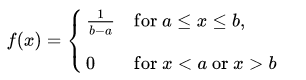

We will next try to visualize a uniform distribution using scipy.

<ipython-input-17-856202569>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_uniform,


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

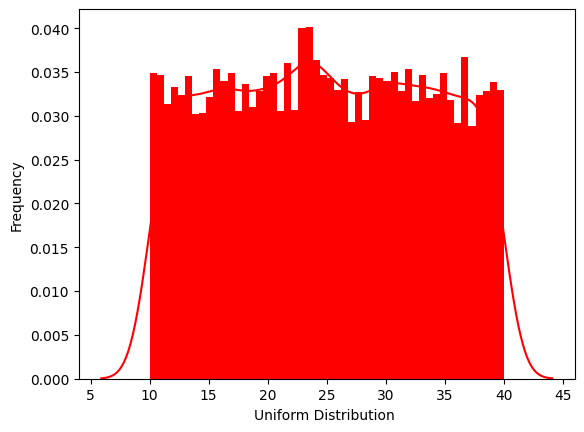

In [17]:
# Plotting random numbers generated from a uniform distribution

n = 10000         # Number of random numbers to be generated
a = 10            # a in the given formula
b = 30            # b in the given formula
data_uniform = scipy.stats.uniform.rvs(size=n, loc = a, scale=b)

# YOUR CODE HERE
ax = sns.distplot(data_uniform,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

**Normal Distribution**

The most popular probability distribution is known as the normal distribution or a Gaussian distribution. The normal distribution is used extensively in data science due to its properties. It is represented by a bell-shaped curve with mean $\mu$ and varience $\sigma$. The probability density function followed by this curve is given by,

$p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}$





Similar to the uniform distribution we will plot the distribution

<ipython-input-18-689383627>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_normal,


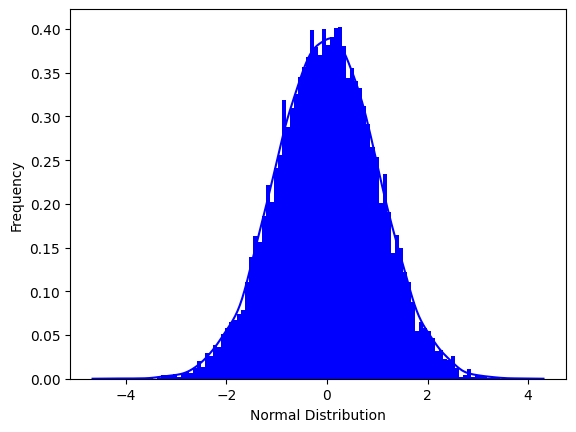

In [18]:
# Let us consider a mean and varience for our normal distribution
mu = 0
standard_dev = 1    # We need to define the standard daviation and not the varience! The function will square it internally.


# 10000 points are sampled from the normal distribution with given mu and sigma = standard_dev^2.
data_normal = scipy.stats.norm.rvs(size=10000, loc=mu, scale=standard_dev)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='b',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()
# YOUR CODE HERE

**Multivariate Normal Distribution**

Till now we have looked at distributions which are univariate and have only one dimensional data. However, distributions can also be multivariate in nature i.e., the data can have multiple dimensions. We see an extension of the univariate normal distribution to a multivariate one. In case of multivariate distribution, the mean $\mu$ is replaced by a $k$-dimensional vector. Similarly the varience $\sigma$ is replaced by a $k \times k$ dimensional covarience matrix $\Sigma$. Formally the equation is,

$p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}$

The covariance matrix $\Sigma$ must be a (symmetric) positive semi-definite matrix. The determinant and inverse of $\Sigma$ are computed as the pseudo-determinant and pseudo-inverse, respectively, so that $\Sigma$ does not need to have full rank.


We check out a bivariate normal distribution and plot it using python. For a bivariate normal distribution $k=2$. The $\mu$ will be a $2d$ vector and $\Sigma$ will be a $2 \times 2$ matrix.

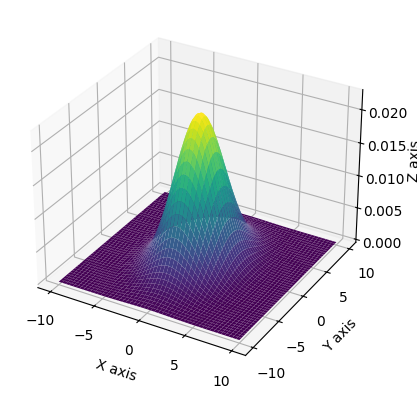

In [20]:
# We set the parameters for mu and sigma first.
# The mu vector is taken as [0, 0] and the cov matrix is taken as [[5, 0]
#                                                                  [0, 10]]
mu_x = 0
variance_x = 5

mu_y = 0
variance_y = 10

# Creating the distribution with the given parameters.
rv = scipy.stats.multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Creating a grid. This is important to plot 3D distributions.
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y


#Make a 3D plot
# YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

For more information about probability distribution in python, please follow: [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)

### Expectation and Moments of Random Variables

**Expectation:** The expected value of a random variable $X$, which is denoted $E(X)$, is a generalization of the weighted average. The expectation or expected value of a random variable is a single number and it tells us a lot about the behavior of the variable. In simple terms, the expectation is the average value of the random variable where each value is weighted according to its probability.

For a discrete random variable that can take $n$ outcomes like $x_1, x_2, x_3, ..., x_n$ with probabilities $p_1, p_2, p_3,..., p_n$, the expectation is given by,

$E(X) = \Sigma_{i=1}^{n}p_i.x_i$

For a continuous random variable we use integration in place of summation. The formula to remember is,

$ E(X) = \int_{x_{min}}^{x_{max}} x.f(x) \,dx $

Here $f(x)$ is the probability density function.

Let us now check a simple python code for finding the expectation of a given discrete random variable. The random variable can take values of $\{1, 4, 3\}$ and have probabilities $\{0.1, 0.5, 0.4\}$.


In [21]:
# A simple function to calculate expectation in python. The function works for discrete random variables only.

def expectation(outcomes, probs):
    e = 0

    # Adding some essential checks.
    if len(outcomes) != len(probs):
      raise ValueError("The number of outcomes and number of probabilities given does not match")

    if sum(probs) != 1:
      raise ValueError("The probability does not sum up to 1!")

    for i in range(len(outcomes)):
      e += outcomes[i] * probs[i]
    return e

# Let us define x and p's.
x = [1, 4, 3]
p = [0.1, 0.5, 0.4]

# YOUR CODE HERE
print ("Expectation of the given random experiment is: ", expectation(x, p))

Expectation of the given random experiment is:  3.3000000000000003


**Moment:** In general, moment of a function are quantitative measures that depicts the shape of the function's graph. In a probability distribution, the first moment is the expectation (described above), the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis, etc. The general formula for a $k^{th}$ moment in ``scipy`` is,

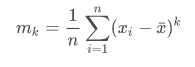

Here $n$ are the number of discrete examples and $\overline{x}$ is the mean of the examples.

To summarize moments,
* 1st moment: expectation
* 2nd order central moment: variance
* 3rd order central moment: Skewness

We will conduct an experiment based on this information. First, we will sample 10,000 points from a normal distribution of know $\mu$ and $\sigma$. We will then use the function to calculate moments. Ideally, the 1st and 2nd moments should match those of $\mu$ and $\sigma$ respectively.

In [22]:
# Declaring mu and sigma according to our choice
mu = 10
standard_dev = 5


# 10000 points are sampled from the normal distribution with given mu and sigma.
data_normal = scipy.stats.norm.rvs(size=10000, loc=mu, scale=standard_dev)

print ("Variance given to the function: ", standard_dev**2)
print("Calculated 2nd moment (varience): ", scipy.stats.moment(data_normal, moment = 2))


print("3rd moment: ", scipy.stats.moment(data_normal, moment = 3))

print("4th moment: ", scipy.stats.moment(data_normal, moment = 4))

# YOUR CODE HERE to print results

Variance given to the function:  25
Calculated 2nd moment (varience):  24.872497363160356
3rd moment:  0.8269915498508635
4th moment:  1881.7397995565996


### Covariance and Correlation

Covariance signifies the direction of the linear relationship between the two variables. The directions are used to represented whether the variables are proportional or inversely proportional to each other.

The values of covariance can be any number between the two opposite infinities. Also, it’s important to mention that covariance only measures how two variables change together, not the dependency of one variable on another one.

The value of covariance between 2 variables is achieved by taking the summation of the product of the differences from the means of the variables as follows:

<center>$Cov(X, Y) = \frac{\Sigma_{i=1}^{N} (x_i - \overline{X}).(y_i - \overline{Y})}{N}$</center>

On the other hand, correlation uses covarience to find the dependency of the variables on each other. In simple terms, it finds how strongly are $X$ and $Y$ depended on each other.

The formula to find correlation between two variables $X$ and $Y$ are -
<center>$Cor (X, Y) = \frac{Cov(X, Y)}{\sigma_X .\sigma_Y} $</center>

Here, $\sigma_X$ and $\sigma_Y$ are the varience (second moment) in X and Y.

The correlation coefficient is a single value ranging from -1 to +1.

The closer it is to +1 or -1, the more closely the two variables are related.

If there is no relationship at all between two variables, then the correlation coefficient will be 0.

We attach a sample python function for each of these measures.


In [26]:
def covariance(x, y):
    # Finding the mean of the series x and y
    # YOUR CODE HERE
    mean_x = scipy.stats.tmean(x)
    mean_y = scipy.stats.tmean(y)

    # Subtracting mean from the individual elements
    # YOUR CODE HERE
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]

    # Using the formula given above
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)

    cov = numerator/denominator

    return cov

def correlation(x, y):
    # Calculating covarience for the numerator
    cov = covariance(x, y)

    # Calculating variance for x and y.
    var_x = np.var(x)
    var_y = np.var(y)

    # The correlation formula is applied
    cor = cov/float(var_x* var_y)

    return cor

# Replace x and y with normal distributions and gaussian distributions to check the effect.
x = [1, 2, 3, 5]
y = [2, 4, 6, 10]

# YOUR CODE HERE

print("Covariance: ", covariance(x, y))
print("Correlation: ", correlation(x, y))

Covariance:  4.375
Correlation:  0.22857142857142856


### Please answer the questions below to complete the experiment:




In [27]:
# @title A box contains 5 Purple marbles, 3 Green marbles and 2 Orange marbles. Marbles are taken one at a time without replacement. P(both marbles are purple)  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "2/9" #@param ["", "2/9", "1/3","1/2","1/4"]

In [28]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [29]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [30]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [31]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [32]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [33]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 581
Date of submission:  18 Jun 2025
Time of submission:  00:13:56
View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions
